In [2]:
%matplotlib inline
import numpy as np

# Using finite differences to approximate derivatives

The material in this notebook is intended to give a brief introduction, and is not comprehensive.

Suppose that you're given a table of values of some "secret" function $f(x)$, but you are not given the function itself.  For example:

In [12]:
x_values = (0, 1, 2, 3, 4)
y_values = (0, 1, 8, 27, 64)

In order to understand the function that generated these values, we could plot them:

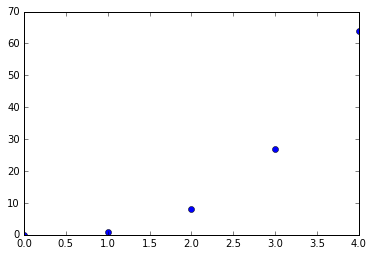

In [15]:
plt.plot(x_values, y_values, 'o')

Each of the points can be connected by a line, and you might use the slope of this line if you wanted to estimate the derivative of the function.  For instance, to estimate the slope at $x=2$, you could use the slope of the line between $x=2$ and $x=3$:

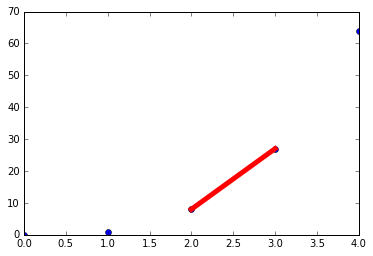

In [17]:
plt.plot(x_values, y_values, 'o')
plt.hold(True)
plt.plot(x_values[2:4], y_values[2:4], '-r', linewidth=5)

$$\left. f'(x) \right|_{x=2} \approx \frac{f(3)-f(2)}{3-2} = 19.$$

Alternatively, you might use the slope of the line between $x=1$ and $x=2$:

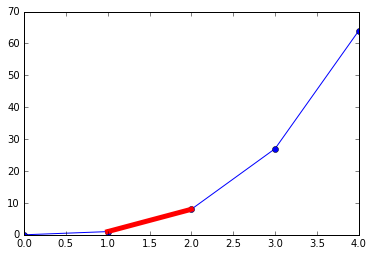

In [18]:
plt.plot(x_values,y_values,'-o')
plt.hold(True)
plt.plot(x_values[1:3],y_values[1:3],'-r',linewidth=5)

$$\left. f'(x) \right|_{x=2} \approx \frac{f(2)-f(1)}{2-1} = 7.$$

Remember that the derivative is defined as the limit of a formula rather like our first approximation above (referred to as a *forward difference*):

$$ f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x)}{(x+h)-x} = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}.$$

Notice that the fraction in the definition is just the slope of the line connecting the values of $f$ at $x$ and $x+h$.  We could equally well define the derivative in terms of a *backward difference*, similar to our second formula above:

$$ f'(x) = \lim_{h\to 0} \frac{f(x)-f(x-h)}{x-(x-h)} = \lim_{h\to 0} \frac{f(x)-f(x-h)}{h}.$$

Yet another way of defining the derivative would be to use the slope of the line connecting points $x+h$ and $x-h$, leading to

$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{2h}.$$

Here the factor $2h$ in the denominator is just the length of the interval $(x-h,x+h)$.  Using this formula with our values gives

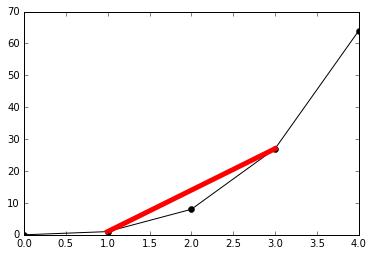

In [19]:
plt.plot(x_values,y_values,'-ok')
plt.hold(True)
plt.plot((x_values[1],x_values[3]),(y_values[1],y_values[3]),'-r',linewidth=5)

$$\left. f'(x) \right|_{x=2} \approx \frac{f(3)-f(1)}{3-1} = 13.$$

When we only know the values of a function at a finite set of points, we can't compute these limits, so it makes sense to use a finite value of $h$ in order to approximate the derivative.  This approach is known as the *finite difference method*.  Soon we will use it to solve differential equations, but first let's examine its effectiveness in approximating derivatives.

You may have guessed that the "secret" function that generated these values is $f(x)=x^3$.  Let's compare our three estimates of the derivative with the true derivative: $f'(2) = 3\cdot 2^2 = 12$.  Clearly the third formula (known as a *centered difference*) is the best approximation.  We can also see this by plotting the approximations and the tangent line (whose slope is that of the true derivative):

(0.5, 3.5, 0, 40)

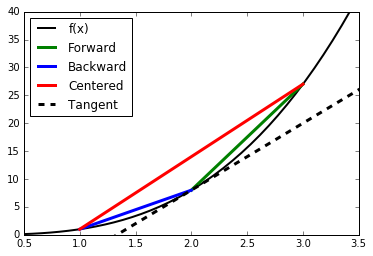

In [20]:
def f(x):
    return x**3

x = np.linspace(0,4)
tangent = 8 + 12*(x-2)
plot(x,f(x),'k',linewidth=2)
plt.plot(x_values[2:4],y_values[2:4],'-g',linewidth=3)
plt.plot(x_values[1:3],y_values[1:3],'-b',linewidth=3)
plt.plot((x_values[1],x_values[3]),(y_values[1],y_values[3]),'-r',linewidth=3)
plt.plot(x,tangent,'--k',linewidth=3)
plt.legend(['f(x)','Forward','Backward','Centered','Tangent'],loc='best')
plt.axis((0.5,3.5,0,40))

It's clear that the centered difference approximation (slope of the red line) is closest to the derivative (slope of the dotted line).  Would this be true if we picked another function $f(x)$, or if we used function values at different points?  Let's answer the second question with an experiment.

In [21]:
x = 2.
df = 12.

for h in (0.1, 0.05, 0.025):
    forward = (f(x+h)-f(x))/h
    forward_error = forward - df
    print(forward_error)

0.6100000000000101
0.30249999999994515
0.15062499999994827


It seems clear from the results that reducing $h$ by a factor of two also reduces the error in the forward difference approximation by a factor of two.

**Now add backward and centered difference approximations to the code above and try to figure out what happens to their errors as $h$ decreases.  Make a table like Table 1.1 on page 5 of the textbook.**  Is the centered difference always the most accurate?  Do you think it will still be the most accurate if we continue reducing $h$?

**Now redefine the function $f(x)$ to be $x^2$ and generate the same table.  Do you see anything surprising?  Can you explain it?**  If not, make a guess.

## Estimating truncation errors

The error made by a finite difference approximation is called *truncation error*.  Why?  Well, we can estimate the error by expanding each function value in a *Taylor series*:

$$f(x+h) = f(x) + h f'(x) + \frac{1}{2}h^2 f''(x) + \frac{1}{6} h^3 f'''(x) + {\mathcal O}(h^4)$$

Here ${\mathcal O}(h^4)$ indicates that the rest of the terms in the series vanish at least as quickly as $h^4$ when $h\to 0$ (see Appendix A of the text).
Substituting this series in our forward difference formula gives
\begin{align}
\frac{f(x+h) - f(x)}{h} & = \frac{f(x) + h f'(x) + \frac{1}{2}h^2 f''(x) + \frac{1}{6} h^3 f'''(x) + {\mathcal O}(h^4) - f(x)}{h} \\
& = f'(x) + \frac{1}{2}h f''(x) + \frac{1}{6} h^2 f'''(x) + {\mathcal O}(h^3) \\
& = f'(x) + \frac{1}{2}h f''(x) + {\mathcal O}(h^2).
\end{align}

This analysis confirms our intuition that the forward difference approximates $f'(x)$, but it tells us much more.  Most importantly, it shows that the largest term in the error in this approximation is proportional to $h$.  That's why we saw that decreasing $h$ by a factor of two caused the error to decrease by the same amount.

Notice that if we truncated the Taylor series after the first term, we would get the forward difference formula exactly.  That is why the error is referred to as *truncation error* -- it's the error we get from truncating an infinite series.  The term $\frac{1}{2} h f''(x)$ is referred to as the *leading truncation error* because when $h$ is very small we expect that term to be much bigger than all the ones that come after it.

Since in our simple example we know the function $f(x)$, we could evaluate error terms in the series above to get a better approximation of the error.  But typically we won't know what the function is (if we did, why would we need finite differences?), so we'll be most interested in knowing what power of $h$ multiplies the leading error term.

**Write down the Taylor series for $f(x-h)$ about $x$.  Use that (and the series above) to work out the leading truncation error terms for the backward and centered difference formulas.**  Does your result for the centered formula allow you to explain the results you found before when applying it to $f(x)=x^2$?

## Polynomial interpolation and finite difference formulas

In sections 1.2-1.5 of the text, a method for finding finite difference formulas is given, based on Taylor series.  Here we will approach the same topic from a different route, using polynomial interpolation.  The idea is this: to approximate the derivative of a function whose point values are known, we first find a polynomial that interpolates those values, then evaluate the derivative of that polynomial.

To begin, suppose we are given three function values: $f(x_0-h), f(x_0), f(x_0+h)$, which we'll denote by $(f_1,f_2,f_3)$.  We wish to find a polynomial that passes through these three points.  As you may know, a set of $n$ values uniquely defines a polynomial of degree $n-1$, so we will look for a quadratic polynomial.  To make the computation simpler, we'll write it this way: $p(x) = a + b (x-x_0) + c (x-x_0)^2$.  We know that $p$ and $f$ must agree at the three given points, which means
\begin{align}
a + b(-h) + c (-h)^2  & = f_1 \\
a + b(0) + c(0)^2 & = f_2 \\
a + b (h) + c (h)^2 & = f_3 \\
\end{align}

or simply

\begin{align}
a - hb + h^2c  & = f_1 \\
a & = f_2 \\
a + hb + h^2c & = f_3 \\
\end{align}

We can rewrite this system of equations in matrix form:

\begin{align}
\begin{pmatrix}
1 & -h & h^2 \\
1 & 0   & 0 \\
1 & h & h^2 \\
\end{pmatrix}
\begin{pmatrix} a \\ b \\ c \end{pmatrix}
& = \begin{pmatrix} f_1 \\ f_2 \\ f_3 \end{pmatrix}
\end{align}

This is a linear system that we can solve for the coefficients $a,b,c$ in terms of $h$, and the values of $f$.  The result is

\begin{align}
a & = f_2, & b & = \frac{f_3-f_1}{2h}, & c & = \frac{f_1 -2 f_2 + f_3}{2h^2}.
\end{align}

Thus

\begin{align}
p(x) = f_2 + \frac{x-x_0}{2h}(f_3-f_1) + \frac{(x-x_0)^2}{2h^2}(f_1-2f_2+f_3).
\end{align}

Now suppose we wish to approximate the derivative of $f$.  We have an easy approach: use the derivative of $p$:

\begin{align}
p'(x) = \frac{f_3-f_1}{2h} + \frac{x-x_0}{h^2}(f_1 -2 f_2 + f_3).
\end{align}

In particular, if want to approximate the derivative at $x=x_0$, we get simply

$$f'(x) \approx p'(x_0) = \frac{f_3-f_1}{2h} = \frac{f(x_0+h) - f(x_0-h)}{2h}.$$

**Do you recognize this approximation?  Now use $p(x)$ to get an approximation for the second derivative of $f(x)$.  Write down the resulting formula.**

<font color='red'>
Derive a formula for $f''(x)$ based on the values $f(x), f(x-h), f(x-3h)$ by determining the interpolating polynomial and differentiating it.  How accurate is your formula?
</font>

**Can you think of a similar approach that would allow you to derive rules for numerical quadrature (integration)?**